In [207]:
import pandas as pd
import numpy as np
import matplotlib as pt

In [208]:
tabelas = ['variaveis']
variaveis = pd.read_excel('Dados - regressao.xlsx', engine="openpyxl")
print(variaveis)

                MUNICIPIO  IDHM  MASSA_PCAP  POP_EST  DESP_TOT_RSU  NRO_EMP
0         Abadia de Goiás 0.708       1.450     9158   1188166.840    3.000
1     Abadia dos Dourados 0.689       1.016     7022   5208595.220    1.000
2               Abadiânia 0.689       1.016    20873   5208595.220    3.000
3                  Abaeté 0.698       1.120    23263    279000.000    1.000
4              Abaetetuba 0.628       0.910   160439   5613966.000    1.000
...                   ...   ...         ...      ...           ...      ...
5565          Xique-Xique 0.585       1.016    46562   5208595.220    0.000
5566               Zabelê 0.623       1.330     2269    756423.910    0.000
5567             Zacarias 0.729       0.820     2784    107400.000    0.000
5568              Zé Doca 0.595       1.340    52190   2131452.000    1.000
5569               Zortéa 0.761       0.990     3432    454051.120    0.000

[5570 rows x 6 columns]


In [209]:
variaveis["NRO_EMP"] = variaveis["NRO_EMP"].replace('0', 1.697)
print(variaveis.isnull().sum())

MUNICIPIO       0
IDHM            0
MASSA_PCAP      0
POP_EST         0
DESP_TOT_RSU    0
NRO_EMP         0
dtype: int64


In [210]:
print(variaveis.shape)

(5570, 6)


In [211]:
print(variaveis.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MUNICIPIO     5570 non-null   object 
 1   IDHM          5570 non-null   float64
 2   MASSA_PCAP    5570 non-null   float64
 3   POP_EST       5570 non-null   int64  
 4   DESP_TOT_RSU  5570 non-null   float64
 5   NRO_EMP       5570 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 261.2+ KB
None


In [212]:
variaveis.describe((), include='all')

,MUNICIPIO,IDHM,MASSA_PCAP,POP_EST,DESP_TOT_RSU,NRO_EMP
count,5570,5570.000,5570.000,5570.000,5570.000,5570.000
unique,5297,NaN,NaN,NaN,NaN,NaN
top,Bom Jesus,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.659,1.016,38297.601,5208595.218,1.698
std,NaN,0.072,0.553,224288.153,46800726.115,9.484
min,NaN,0.418,0.030,771.000,12500.000,0.000
50%,NaN,0.665,0.990,11732.000,1105360.000,0.000
max,NaN,0.862,5.900,12396372.000,2348522610.920,532.000


In [213]:
print(variaveis.median())

IDHM                 0.665
MASSA_PCAP           0.990
POP_EST          11732.000
DESP_TOT_RSU   1105360.000
NRO_EMP              0.000
dtype: float64


C:\Users\Ana Luisa Schneider\AppData\Local\Temp\ipykernel_8768\4120702748.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(variaveis.median())


In [214]:
print(variaveis.var())

IDHM                          0.005
MASSA_PCAP                    0.305
POP_EST             50305175490.645
DESP_TOT_RSU   2190307964854468.500
NRO_EMP                      89.937
dtype: float64


C:\Users\Ana Luisa Schneider\AppData\Local\Temp\ipykernel_8768\2159711142.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(variaveis.var())


In [215]:
print(variaveis.columns)

Index(['MUNICIPIO', 'IDHM', 'MASSA_PCAP', 'POP_EST', 'DESP_TOT_RSU',
       'NRO_EMP'],
      dtype='object')


In [216]:
variaveis.value_counts()

MUNICIPIO        IDHM   MASSA_PCAP  POP_EST  DESP_TOT_RSU  NRO_EMP
Abadia de Goiás  0.708  1.450       9158     1188166.840   3.000      1
Peritiba         0.766  0.480       2733     193933.680    0.000      1
Petrolina        0.697  1.280       359372   26704724.100  11.000     1
Pesqueira        0.610  0.280       68067    2204362.360   0.000      1
Pescaria Brava   0.659  0.560       10225    639549.100    3.000      1
                                                                     ..
Gastão Vidigal   0.723  0.690       4911     223895.030    0.000      1
Gaspar           0.765  0.880       71925    7343891.460   14.000     1
Garça            0.769  0.730       44429    3764673.930   2.000      1
Garuva           0.725  0.750       18816    2250498.220   3.000      1
Óleo             0.730  0.910       2447     108135.000    0.000      1
Length: 5570, dtype: int64

In [217]:
variaveis.corr()

,IDHM,MASSA_PCAP,POP_EST,DESP_TOT_RSU,NRO_EMP
IDHM,1.000,-0.085,0.144,0.109,0.212
MASSA_PCAP,-0.085,1.000,0.002,0.009,-0.009
POP_EST,0.144,0.002,1.000,0.946,0.946
DESP_TOT_RSU,0.109,0.009,0.946,1.000,0.858
NRO_EMP,0.212,-0.009,0.946,0.858,1.000


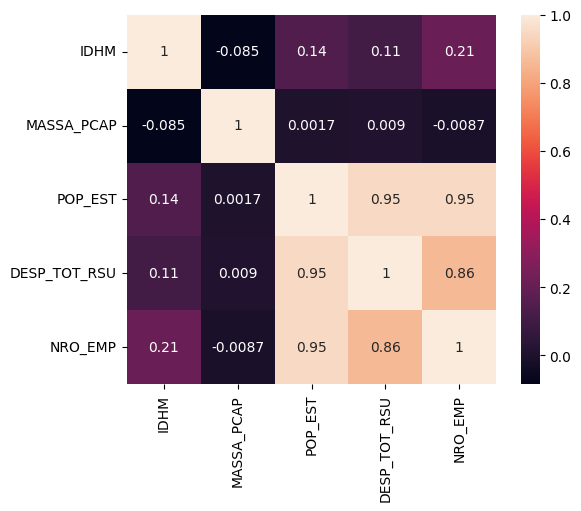

In [229]:
corr = variaveis.corr()
sns.heatmap(corr, annot=True, square=True)
plt.show()

array([[<AxesSubplot:title={'center':'IDHM'}>,
        <AxesSubplot:title={'center':'MASSA_PCAP'}>],
       [<AxesSubplot:title={'center':'POP_EST'}>,
        <AxesSubplot:title={'center':'DESP_TOT_RSU'}>],
       [<AxesSubplot:title={'center':'NRO_EMP'}>, <AxesSubplot:>]],
      dtype=object)

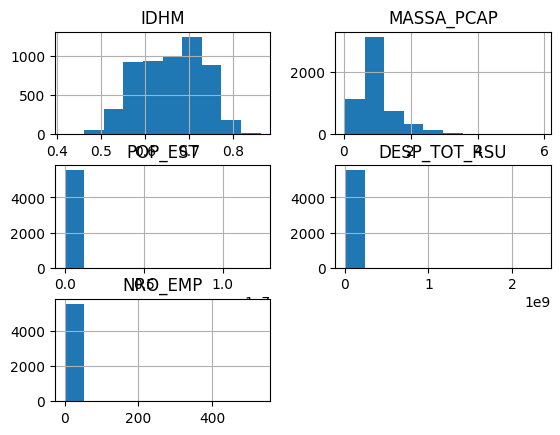

In [230]:
variaveis.hist()

## Normalizar
normalizando com fórmula (z = (x - u) / s)

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
tabelas = ['variaveis']
variaveis = pd.read_excel('Dados - regressao.xlsx', engine="openpyxl")


In [233]:
variaveis["NRO_EMP"] = variaveis["NRO_EMP"].replace('0', 1.697)
print(variaveis.isnull().sum())

MUNICIPIO       0
IDHM            0
MASSA_PCAP      0
POP_EST         0
DESP_TOT_RSU    0
NRO_EMP         0
dtype: int64


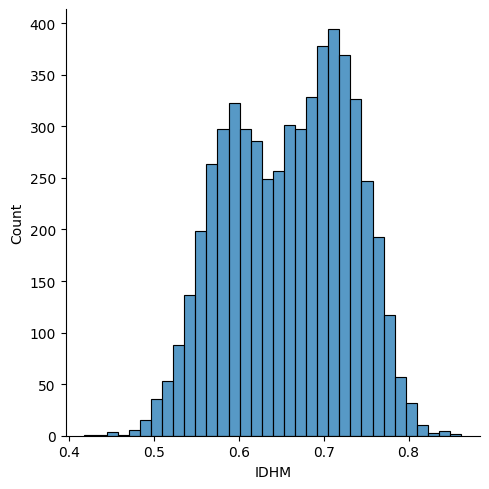

In [234]:
sns.displot(variaveis['IDHM'])

In [235]:
normal_vari = variaveis.copy()

In [236]:
for col in ['MASSA_PCAP','POP_EST', 'IDHM', 'DESP_TOT_RSU']:
    normal_vari[col]= (normal_vari[col] - normal_vari[col].mean()) / normal_vari[col].std()

In [262]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

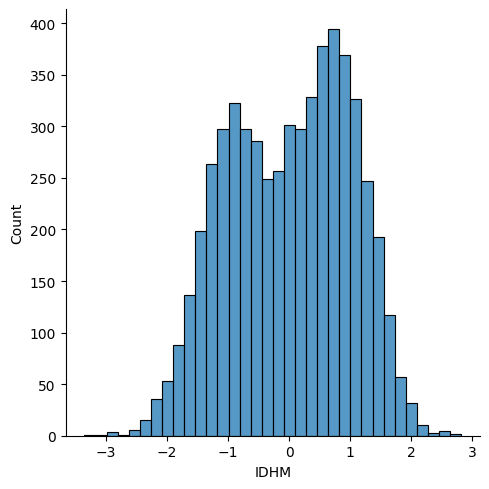

In [238]:
sns.displot(normal_vari['IDHM'])

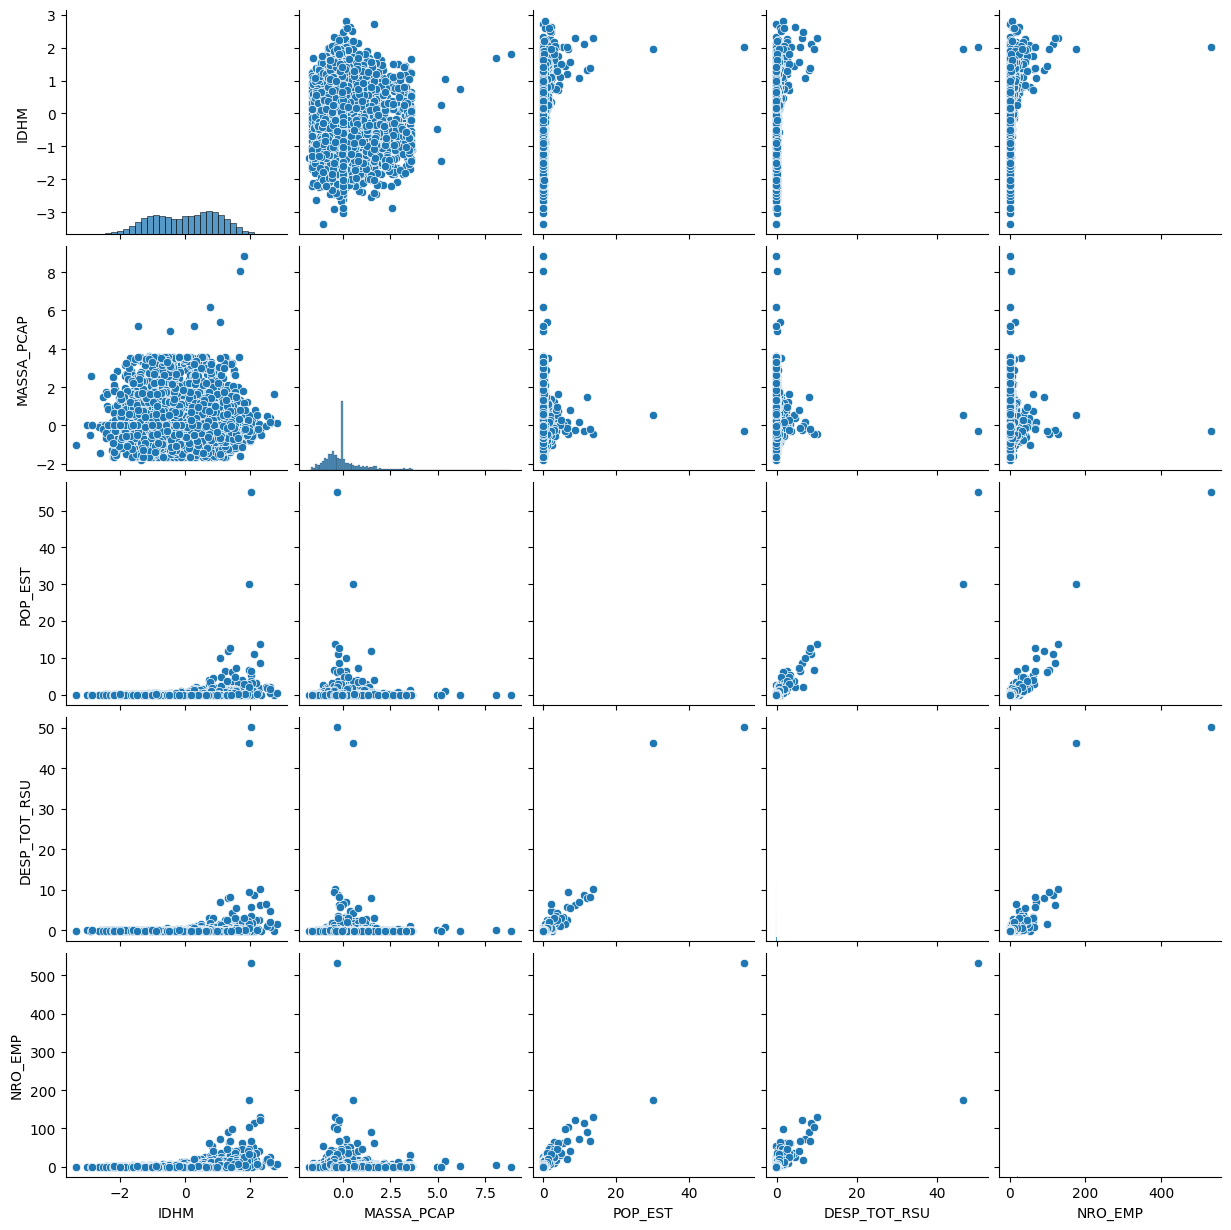

In [239]:
sns.pairplot(normal_vari)

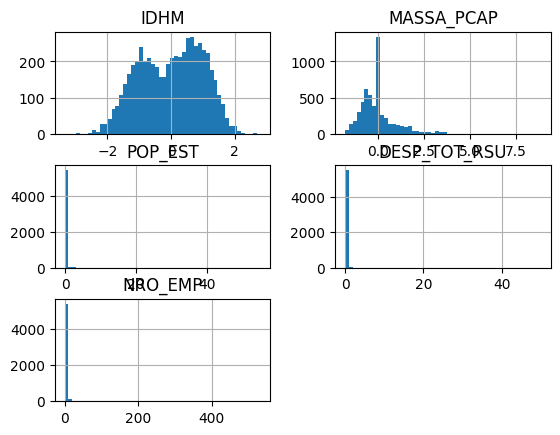

In [240]:
vari_hist = normal_vari.hist(bins=50)
print()

In [241]:
##previsão

In [242]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score

In [243]:
x = variaveis.iloc[:, 1:-1]
y = variaveis.iloc[:, 1:5].values

In [244]:
x_train,x_test,y_train,y_test= ms.train_test_split(x,y,test_size=0.2,random_state=0)

In [245]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (4456, 4)
x_test: (1114, 4)
y_train: (4456, 4)
y_test: (1114, 4)


In [246]:
regressor = lm.LinearRegression()
regressor.fit(variaveis[['IDHM','MASSA_PCAP','POP_EST','DESP_TOT_RSU']],variaveis.NRO_EMP)

LinearRegression()

In [247]:
y_pred = regressor.predict(x_test)
print(y_pred)

[ 0.64759631 -0.04401244 -0.02371608 ...  4.9020072  -0.33384387
  4.46536615]


ValueError: x and y must be the same size

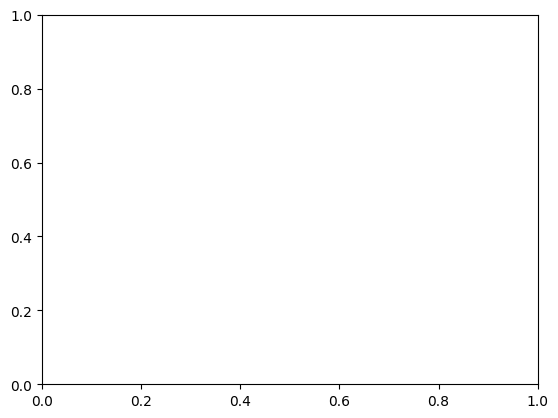

In [248]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted')
plt.show()

In [249]:
regressor.coef_

array([ 8.97599814e+00, -3.64752572e-02,  5.28476210e-05, -6.72080017e-08])

In [250]:
regressor.intercept_

-5.855590058205729

## Normalizar
normalizando com scikit

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [252]:
tabelas = ['variaveis']
variaveis = pd.read_excel('Dados - regressao.xlsx', engine="openpyxl")

In [253]:
variaveis["NRO_EMP"] = variaveis["NRO_EMP"].replace('0', 1.697)
print(variaveis.isnull().sum())

MUNICIPIO       0
IDHM            0
MASSA_PCAP      0
POP_EST         0
DESP_TOT_RSU    0
NRO_EMP         0
dtype: int64


In [254]:
norm_sk=variaveis.copy()

In [255]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

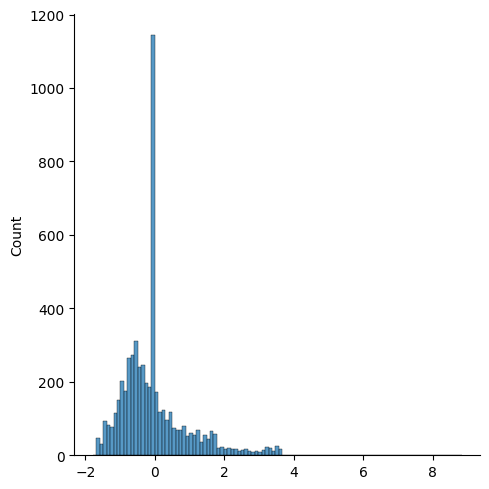

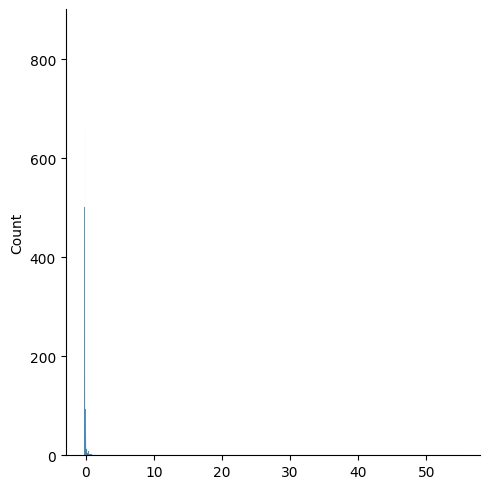

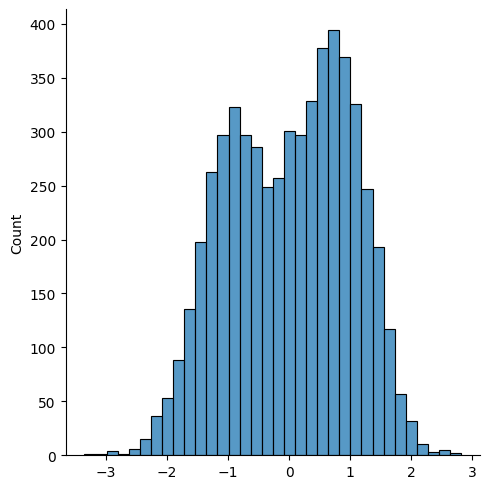

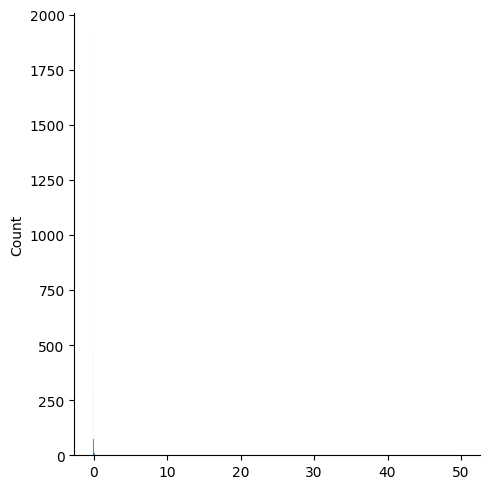

In [256]:
for col in ['MASSA_PCAP','POP_EST', 'IDHM', 'DESP_TOT_RSU']:
 sc.fit(norm_sk[[col]])
 sc_vari2=sc.transform(norm_sk[[col]])
 sc_vari2 = sc_vari2.reshape(-1)
 sns.displot(sc_vari2)

In [257]:
#previsão

In [258]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm
from sklearn.metrics import r2_score

In [259]:
x = variaveis.iloc[:, 1:-1].values
y = variaveis.iloc[:, 1:5].values

In [260]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= ms.train_test_split(x,y,test_size=0.2,random_state=0)

In [261]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (4456, 4)
x_test: (1114, 4)
y_train: (4456, 4)
y_test: (1114, 4)


In [166]:
regressor = lm.LinearRegression()
regressor.fit(variaveis[['IDHM','MASSA_PCAP','POP_EST','DESP_TOT_RSU']],variaveis.NRO_EMP)

LinearRegression()

In [167]:
print(y_test)

[[7.14000000e-01 1.01600000e+00 9.11000000e+03 5.20859522e+06]
 [5.89000000e-01 1.01600000e+00 1.72540000e+04 5.20859522e+06]
 [6.30000000e-01 4.30000000e-01 3.83100000e+03 1.45514390e+05]
 ...
 [7.55000000e-01 6.00000000e-01 8.49800000e+04 7.26679868e+06]
 [5.49000000e-01 6.90000000e-01 1.26460000e+04 7.32351470e+05]
 [7.10000000e-01 1.65000000e+00 8.00620000e+04 3.31663680e+06]]


In [168]:
y_pred = regressor.predict(x_test)
print(y_pred)

[ 0.64759631 -0.04401244 -0.02371608 ...  4.9020072  -0.33384387
  4.46536615]


C:\Users\Ana Luisa Schneider\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: x and y must be the same size

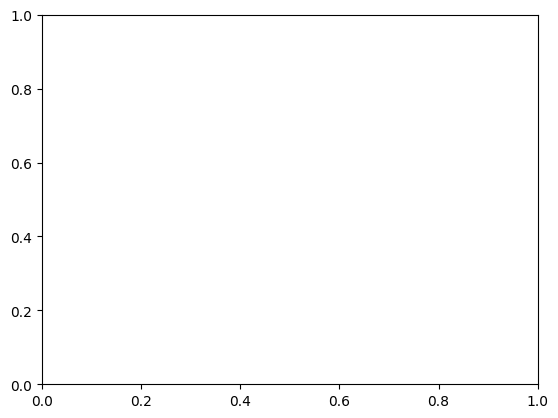

In [169]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted')
plt.show()

In [170]:
Accuracy=r2_score(y_test,y_pred)*100
print(Accuracy)

ValueError: y_true and y_pred have different number of output (4!=1)